# Examples of the pyrankability package

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import copy
import os

In [3]:
from IPython.core.display import display, HTML
import pandas as pd
import numpy as np

In [4]:
from pathlib import Path
home = str(Path.home())

import sys
# We need to include the path to pyrankability. This could be different for Tim, but altneratively he could point to your copy
sys.path.insert(0,"%s/rankability_toolbox_dev"%home)

import pyrankability

# Simple examples

## Example 1

In [5]:
n=8
D=np.zeros((n,n))
D[np.triu_indices(n,1)]=1
D[[5,3,7]] = 1-D[[5,3,7]]
D=pd.DataFrame(D)

### Hillside

In [6]:
k_hillside,details_hillside = pyrankability.rank.solve(D,method='hillside')
k_hillside

Restricted license - for non-production use only - expires 2022-01-13


54

In [7]:
k_lop,details_lop = pyrankability.rank.solve(D,method='lop')
k_lop

12.0

### Exhaustive

In [6]:
k,details = pyrankability.rank.solve_exhaustive_error(D,max_error=5,min_error=0,method='hillside')

In [7]:
k

54.0

In [432]:
len(details['P'])

136

In [433]:
perm

(6, 5, 4, 3, 2, 7, 1, 0)

In [434]:
np.argsort(perm)

array([7, 6, 4, 3, 2, 1, 0, 5])

In [435]:
c[np.ix_(perm,perm)]

array([[ 0.,  6.,  3.,  5.,  6.,  7.,  8., 10.],
       [ 2.,  0.,  3.,  1.,  4.,  3.,  5.,  6.],
       [ 1.,  5.,  0.,  4.,  3.,  6.,  5.,  7.],
       [ 3.,  3.,  4.,  0.,  5.,  6.,  6.,  7.],
       [ 2.,  4.,  1.,  3.,  0.,  5.,  2.,  4.],
       [ 1.,  1.,  2.,  2.,  3.,  0.,  4.,  5.],
       [ 2.,  3.,  1.,  2.,  0.,  4.,  0.,  2.],
       [ 2.,  2.,  1.,  1.,  0.,  3.,  0.,  0.]])

In [436]:
c

array([[ 0.,  0.,  0.,  1.,  1.,  2.,  2.,  3.],
       [ 2.,  0.,  0.,  2.,  1.,  3.,  2.,  4.],
       [ 4.,  2.,  0.,  3.,  1.,  4.,  2.,  5.],
       [ 7.,  6.,  5.,  0.,  4.,  3.,  3.,  6.],
       [ 7.,  5.,  3.,  4.,  0.,  5.,  1.,  6.],
       [ 6.,  5.,  4.,  1.,  3.,  0.,  2.,  3.],
       [10.,  8.,  6.,  5.,  3.,  6.,  0.,  7.],
       [ 5.,  4.,  3.,  2.,  2.,  1.,  1.,  0.]])

In [455]:
xstar = np.zeros((D.shape[0],D.shape[0]))
c = pyrankability.common.compute_C(D)
objs = []
for perm in details['P']:
    x = pyrankability.common.perm_to_x(perm)
    objs.append(np.sum(c*x))
    xstar += x
xstar = xstar/len(details['P'])
pd.DataFrame(xstar)

,0,1,2,3,4,5,6,7
0,1.000000,0.823529,1.000000,1.000000,1.000000,1.000000,1.000000,0.823529
1,0.176471,1.000000,0.882353,1.000000,1.000000,0.882353,1.000000,0.500000
2,0.000000,0.117647,1.000000,0.882353,0.882353,0.500000,1.000000,0.117647
3,0.000000,0.000000,0.117647,1.000000,0.500000,0.117647,0.823529,0.000000
4,0.000000,0.000000,0.117647,0.500000,1.000000,0.117647,0.823529,0.000000
5,0.000000,0.117647,0.500000,0.882353,0.882353,1.000000,1.000000,0.117647
6,0.000000,0.000000,0.000000,0.176471,0.176471,0.000000,1.000000,0.000000
7,0.176471,0.500000,0.882353,1.000000,1.000000,0.882353,1.000000,1.000000


### Hillside

In [438]:
k_hillside,details_hillside = pyrankability.rank.solve(D,method='hillside')
k_hillside

54.0

In [439]:
sys.path.insert(0,"../sensitivity_study/src")

In [440]:
k_hillside,details_hillside = pyrankability.rank.solve(D,method='hillside',cont=True)
k_hillside

53.99999999984691

In [441]:
massey_ranking = MasseyRankingAlgorithm().rank(D)
colley_ranking = ColleyRankingAlgorithm().rank(D)
massey_ranking,colley_ranking

([0, 1, 5, 2, 3, 4, 6, 7], [0, 1, 7, 2, 5, 4, 3, 6])

In [442]:
massey_x = 1-pyrankability.common.perm_to_x(massey_ranking)
colley_x = 1-pyrankability.common.perm_to_x(colley_ranking)
k_massey = np.sum(c*massey_x)
k_colley = np.sum(c*colley_x)
k_massey,k_colley

(72.0, 54.0)

In [443]:
pd.DataFrame(details_hillside['x'])

,0,1,2,3,4,5,6,7
0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00
1,1.205391e-11,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,5.000000e-01
2,2.089662e-12,6.615264e-12,0.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01,1.0,6.615247e-12
3,7.394085e-14,6.699086e-13,6.615264e-12,0.000000e+00,5.000000e-01,6.615250e-12,1.0,6.699724e-13
4,7.382983e-14,6.699086e-13,6.615264e-12,5.000000e-01,0.000000e+00,6.615220e-12,1.0,6.699718e-13
5,2.089662e-12,6.615264e-12,5.000000e-01,1.000000e+00,1.000000e+00,0.000000e+00,1.0,6.615260e-12
6,6.539214e-14,7.394085e-14,2.089662e-12,1.205391e-11,1.205391e-11,2.089662e-12,0.0,7.396602e-14
7,1.205391e-11,5.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,0.000000e+00


In [444]:
pd.DataFrame(pyrankability.common.threshold_x(details_hillside['x']))

,0,1,2,3,4,5,6,7
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.5
2,0.0,0.0,0.0,1.0,1.0,0.5,1.0,0.0
3,0.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0
4,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0
5,0.0,0.0,0.5,1.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.5,1.0,1.0,1.0,1.0,1.0,0.0


In [445]:
np.unique(objs)

array([54., 56., 58.])

In [446]:
errors

[0, 2, 4]

In [456]:
pd.DataFrame(xstar)

,0,1,2,3,4,5,6,7
0,1.000000,0.823529,1.000000,1.000000,1.000000,1.000000,1.000000,0.823529
1,0.176471,1.000000,0.882353,1.000000,1.000000,0.882353,1.000000,0.500000
2,0.000000,0.117647,1.000000,0.882353,0.882353,0.500000,1.000000,0.117647
3,0.000000,0.000000,0.117647,1.000000,0.500000,0.117647,0.823529,0.000000
4,0.000000,0.000000,0.117647,0.500000,1.000000,0.117647,0.823529,0.000000
5,0.000000,0.117647,0.500000,0.882353,0.882353,1.000000,1.000000,0.117647
6,0.000000,0.000000,0.000000,0.176471,0.176471,0.000000,1.000000,0.000000
7,0.176471,0.500000,0.882353,1.000000,1.000000,0.882353,1.000000,1.000000


In [472]:
errors = [0,2,4]
xstar = np.zeros((len(D),len(D)))
for error in errors:
    print(error)
    k_hillside,details_hillside,models = pyrankability.rank.solve_error(D,max_error=error,min_error=error,method='hillside',cont=True)
    #print(k_hillside)
    xstar += details_hillside['x']
xstar = xstar/len(list(errors))

0
2
Fixing error to 2.000000
4
Fixing error to 4.000000


In [473]:
k_hillside,details_hillside,models = pyrankability.rank.solve_error(D,max_error=4,min_error=0,method='hillside',cont=True)

Adding error varible


GurobiError: Inequality constraints not supported

In [474]:
pd.DataFrame(pyrankability.common.threshold_x(details_hillside['x']))

,0,1,2,3,4,5,6,7
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.520784
2,1.0,1.000000,0.000000,0.000000,0.000000,0.479185,0.0,1.000000
3,1.0,1.000000,1.000000,0.000000,0.451219,1.000000,0.0,1.000000
4,1.0,1.000000,1.000000,0.548781,0.000000,1.000000,0.0,1.000000
5,1.0,1.000000,0.520815,0.000000,0.000000,0.000000,0.0,1.000000
6,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000
7,1.0,0.479216,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [475]:
pd.DataFrame(pyrankability.common.threshold_x(xstar))

,0,1,2,3,4,5,6,7
0,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
1,0.666667,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.513807
2,0.666667,0.666667,0.000000,0.333333,0.333333,0.486202,0.333333,0.666667
3,0.666667,0.666667,0.666667,0.000000,0.467670,0.666667,0.333333,0.666667
4,0.666667,0.666667,0.666667,0.532330,0.000000,0.666667,0.333333,0.666667
5,0.666667,0.666667,0.513798,0.333333,0.333333,0.000000,0.333333,0.666667
6,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.000000,0.666667
7,0.666667,0.486193,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000


In [ ]:
k_hillside,details_hillside,models = pyrankability.rank.solve_error(D,max_error=error,min_error=error,method='hillside',cont=True)

In [419]:
k_hillside,details_hillside,models = pyrankability.rank.solve_error2(D,max_error=3,min_error=0,method='hillside',cont=True)

Adding error varibles
skipping this because of quadratic
here


GurobiError: Objective Q not PSD (diagonal adjustment of 2.0e+00 would be required)

In [335]:
k_hillside

54.0

In [334]:
pd.DataFrame(pyrankability.common.threshold_x(details_hillside['x']))

,0,1,2,3,4,5,6,7
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [288]:
details_hillside['x']

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.52285978e-11, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 5.00000000e-01],
       [2.98128189e-12, 2.08730810e-11, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 5.00000000e-01, 1.00000000e+00, 2.08730365e-11],
       [3.16746629e-13, 7.98361377e-13, 2.08730810e-11, 0.00000000e+00,
        5.00000000e-01, 2.08730715e-11, 1.00000000e+00, 7.98387428e-13],
       [3.16635607e-13, 7.98361377e-13, 2.08730810e-11, 5.00000000e-01,
        0.00000000e+00, 2.08730555e-11, 1.00000000e+00, 7.98387119e-13],
       [2.98117087e-12, 2.08729700e-11, 5.00000000e-01, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.08730150e-11],
       [4.88498131e-14, 3.16635607e-13, 2.98128189e-12, 3.52285978e-11,
        3.52285978e-11, 2.98128189e-12, 0.00000000e+00, 3.

In [84]:
models["zero_error_models"]['error_models'][0]

<gurobi.Model MIP instance hillside: 112 constrs, 29 vars, Parameter changes: LogFile=gurobi.log, CSIdleTimeout=1800, OutputFlag=0>

In [85]:
model_file = pyrankability.common.write_model(models["zero_error_models"]['error_models'][0])
model_file

'/tmp/tmpfrlz0346/model.mps'

In [86]:
models["error_models"][0]

<gurobi.Model MIP instance hillside: 114 constrs, 29 vars, Parameter changes: LogFile=gurobi.log, CSIdleTimeout=1800, OutputFlag=0>

In [87]:
model_file = pyrankability.common.write_model(models["error_models"][0])
model_file

'/tmp/tmp0n6ryv1d/model.mps'

In [89]:
solution_file = model_file + ".solutions"

In [ ]:
%%timeit
%%bash -s "$model_file" "$solution_file"
./collect.sh $1 $2

In [136]:
solutions = pd.read_csv(solution_file,sep=', ')
x_columns = solutions.columns[1:-1]
xs = []
a,b,c = 1,1,-2*len(x_columns)
n = int((-b + np.sqrt(b**2 - 4*a*c))/(2*a) + 1)
xstar = np.zeros((n,n))
C = pyrankability.common.compute_C(D)
opt_k = k_hillside
objs = []
s = 0
for k in range(solutions.shape[0]):
    x = np.zeros((n,n))
    for c in x_columns:
        ij_str = c.replace("x(","").replace(")","")
        i,j = ij_str.split(",")
        i,j = int(i),int(j)
        x[i,j] = solutions.loc[k,c]
        x[j,i] = 1 - x[i,j]
    obj = np.sum(C*x)
    xs.append(x)
    objs.append(obj)
    error = obj - opt_k
    xstar += x
xstar = xstar/solutions.shape[0]
pd.DataFrame(xstar)

/data/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7
0,0.000000,0.823529,1.000000,1.000000,1.000000,1.000000,1.000000,0.823529
1,0.176471,0.000000,0.882353,1.000000,1.000000,0.882353,1.000000,0.500000
2,0.000000,0.117647,0.000000,0.882353,0.882353,0.500000,1.000000,0.117647
3,0.000000,0.000000,0.117647,0.000000,0.500000,0.117647,0.823529,0.000000
4,0.000000,0.000000,0.117647,0.500000,0.000000,0.117647,0.823529,0.000000
5,0.000000,0.117647,0.500000,0.882353,0.882353,0.000000,1.000000,0.117647
6,0.000000,0.000000,0.000000,0.176471,0.176471,0.000000,0.000000,0.000000
7,0.176471,0.500000,0.882353,1.000000,1.000000,0.882353,1.000000,0.000000


In [161]:
solutions

,#,"x(6,7)","x(5,6)","x(4,7)","x(4,6)","x(4,5)","x(3,7)","x(3,6)","x(3,5)","x(3,4)",...,"x(1,2)","x(0,7)","x(0,6)","x(0,5)","x(0,4)","x(0,3)","x(0,2)","x(0,1)","x(5,7)",objval
0,1(1),0,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,58
1,1(2),0,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,58
2,1(3),0,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,58
3,1(4),0,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,58
4,1(5),0,1,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,0,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,69(132),0,1,0,1,0,0,1,0,1,...,1,0,1,1,1,1,1,0,0,58
132,70(133),0,1,0,1,0,0,1,0,0,...,0,0,1,1,1,1,1,1,0,58
133,70(134),0,1,0,1,0,0,1,0,1,...,0,0,1,1,1,1,1,1,0,58
134,71(135),0,1,0,1,0,0,1,0,0,...,1,0,1,1,1,1,1,1,0,56


In [243]:
k_hillside_cont,details_hillside_cont,models_cont = pyrankability.rank.solve_error(D,max_error=5,min_error=0,method='hillside',cont=True)
pd.DataFrame(pyrankability.common.threshold_x(details_hillside_cont['x']))

54.0


,0,1,2,3,4,5,6,7
0,0.000000,0.806372,0.944021,1.000000,1.000000,0.944021,0.995474,0.807082
1,0.193628,0.000000,0.870057,0.976185,0.976185,0.870057,0.998068,0.500399
2,0.055979,0.129943,0.000000,0.870878,0.870878,0.500000,0.944089,0.130125
3,0.000000,0.023815,0.129122,0.000000,0.500000,0.129122,0.803885,0.024002
4,0.000000,0.023815,0.129122,0.500000,0.000000,0.129122,0.803885,0.024002
5,0.055979,0.129943,0.500000,0.870878,0.870878,0.000000,0.944089,0.130125
6,0.004526,0.001932,0.055911,0.196115,0.196115,0.055911,0.000000,0.003330
7,0.192918,0.499601,0.869875,0.975998,0.975998,0.869875,0.996670,0.000000


In [44]:
pd.DataFrame(pyrankability.common.threshold_x(details_hillside['x']))

,0,1,2,3,4,5,6,7
0,0.000000,0.954798,0.997332,1.000000,1.000000,1.000000,1.000000,0.946501
1,0.045202,0.000000,0.963088,0.997471,0.997471,0.959052,0.998700,0.494038
2,0.002668,0.036912,0.000000,0.964066,0.964066,0.497251,0.998706,0.022380
3,0.000000,0.002529,0.035934,0.000000,0.500000,0.029570,0.950590,0.001150
4,0.000000,0.002529,0.035934,0.500000,0.000000,0.029570,0.950590,0.001150
5,0.000000,0.040948,0.502749,0.970430,0.970430,0.000000,0.997360,0.026077
6,0.000000,0.001300,0.001294,0.049410,0.049410,0.002640,0.000000,0.000000
7,0.053499,0.505962,0.977620,0.998850,0.998850,0.973923,1.000000,0.000000


In [54]:
details_hillside

{'Pfirst': [(0, 7, 1, 5, 2, 4, 3, 6)],
 'P': [(0, 7, 1, 5, 2, 4, 3, 6)],
 'x': array([[0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0]]),
 'objs': [54.0],
 'xs': [array([[0, 1, 1, 1, 1, 1, 1, 1],
         [0, 0, 1, 1, 1, 1, 1, 0],
         [0, 0, 0, 1, 1, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 1, 0, 0, 1, 0],
         [0, 0, 1, 1, 1, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 1, 1, 1, 1, 1, 0]])],
 'pair_details': None,
 'method': 'hillside'}

In [55]:
details_hillside['P']

[(0, 7, 1, 5, 2, 4, 3, 6)]

**You can return fractional/continuous x**

In [192]:
k_hillside,details_hillside = pyrankability.rank.solve(D,method='hillside',cont=True)
k_hillside

53.99999999984691

In [194]:
pyrankability.common.threshold_x(details_hillside['x'])

array([[0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
       [0. , 0. , 1. , 1. , 1. , 1. , 1. , 0.5],
       [0. , 0. , 0. , 1. , 1. , 0.5, 1. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 1. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0. , 1. , 0. ],
       [0. , 0. , 0.5, 1. , 1. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 1. , 1. , 1. , 1. , 1. , 0. ]])

### LOP

In [56]:
k_lop,details_lop = pyrankability.rank.solve(D,method='lop')
k_lop

25.0

In [57]:
details_lop['P']

[(7, 0, 1, 2, 4, 6, 5, 3)]

### Multiple solutions with random restarts

In [58]:
k_hillside_10,details_hillside_10 = pyrankability.rank.solve(D,method='hillside',num_random_restarts=10)
k_hillside_10

Read MPS format model from file /tmp/tmp7q3tdruc/model.mps
Reading time = 0.00 seconds
hillside: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp7q3tdruc/model.mps
Reading time = 0.00 seconds
hillside: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp7q3tdruc/model.mps
Reading time = 0.00 seconds
hillside: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp7q3tdruc/model.mps
Reading time = 0.00 seconds
hillside: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp7q3tdruc/model.mps
Reading time = 0.00 seconds
hillside: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp7q3tdruc/model.mps
Reading time = 0.00 seconds
hillside: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp7q3tdruc/model.mps
Reading time = 0.00 seconds
hillside: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp7q3tdruc/model.mps
Reading time = 0.

54.0

In [59]:
details_hillside_10['P']

[(0, 7, 1, 5, 2, 4, 3, 6),
 (0, 7, 1, 2, 5, 4, 3, 6),
 (0, 1, 7, 5, 2, 4, 3, 6),
 (0, 1, 7, 2, 5, 4, 3, 6),
 (0, 7, 1, 2, 5, 3, 4, 6),
 (0, 1, 7, 2, 5, 4, 3, 6),
 (0, 1, 7, 2, 5, 4, 3, 6),
 (0, 7, 1, 2, 5, 4, 3, 6),
 (0, 7, 1, 2, 5, 4, 3, 6),
 (0, 7, 1, 2, 5, 4, 3, 6),
 (0, 1, 7, 2, 5, 4, 3, 6)]

In [60]:
k_lop_10,details_lop_10 = pyrankability.rank.solve(D,method='lop',num_random_restarts=10)
k_lop_10

Read MPS format model from file /tmp/tmpwufgl7qc/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpwufgl7qc/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpwufgl7qc/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpwufgl7qc/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpwufgl7qc/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpwufgl7qc/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpwufgl7qc/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpwufgl7qc/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 column

25.0

In [61]:
details_lop_10['P']

[(7, 0, 1, 2, 4, 6, 5, 3),
 (7, 5, 0, 1, 2, 4, 6, 3),
 (0, 7, 1, 2, 4, 5, 3, 6),
 (0, 7, 1, 5, 3, 2, 4, 6),
 (7, 0, 5, 3, 1, 2, 4, 6),
 (0, 1, 7, 2, 4, 6, 5, 3),
 (7, 0, 1, 5, 3, 2, 4, 6),
 (7, 5, 0, 1, 2, 4, 6, 3),
 (0, 7, 5, 1, 2, 3, 4, 6),
 (7, 5, 0, 1, 2, 4, 6, 3),
 (0, 1, 2, 7, 4, 5, 3, 6)]

### Multiple solutions with pairs

In [139]:
k_hillside_10_paired,details_hillside_10_paired = pyrankability.rank.solve(D,method='hillside',num_random_restarts=10,find_pair=True)
k_hillside_10_paired

Read MPS format model from file /tmp/tmpb97kai5u/model.mps
Reading time = 0.00 seconds
hillside: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpb97kai5u/model.mps
Reading time = 0.00 seconds
hillside: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpb97kai5u/model.mps
Reading time = 0.00 seconds
hillside: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpb97kai5u/model.mps
Reading time = 0.00 seconds
hillside: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpb97kai5u/model.mps
Reading time = 0.00 seconds
hillside: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpb97kai5u/model.mps
Reading time = 0.00 seconds
hillside: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpb97kai5u/model.mps
Reading time = 0.00 seconds
hillside: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpb97kai5u/model.mps
Reading time = 0.

54.0

If you want to check out the second pair:

In [140]:
details_hillside_10_paired['P'][1]

(0, 7, 1, 5, 2, 3, 4, 6)

In [141]:
details_hillside_10_paired['pair_details']['P'][1]

(0, 1, 7, 2, 5, 4, 3, 6)

In [144]:
details_hillside_10_paired['P'][1],details_hillside_10_paired['pair_details']['P'][1]

((0, 7, 1, 5, 2, 3, 4, 6), (0, 1, 7, 2, 5, 4, 3, 6))

Visualize it

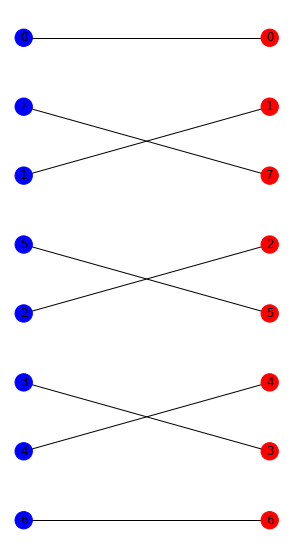

In [145]:
pyrankability.plot.spider(pyrankability.plot.AB_to_P2(details_hillside_10_paired['P'][1],details_hillside_10_paired['pair_details']['P'][1]))

### What if you wanted to have more control and find the most different from a specific ranking?

In [146]:
perm_x = details_hillside_10_paired['P'][1]
x = details_hillside_10_paired['xs'][1]

k_,details_ = pyrankability.search.solve_max_tau(D,k_hillside_10_paired,x,method='hillside',verbose=True)

Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Start pair optimization
Optimize a model with 197 rows, 112 columns and 557 nonzeros
Variable types: 56 continuous, 56 integer (56 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Found heuristic solution: objective -0.0000000
Presolve removed 197 rows and 112 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 8 available processors)

Solution count 2: 3 -0 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%
Optimization in 0.0134 seconds
End optimization


In [147]:
perm_x

(0, 7, 1, 5, 2, 3, 4, 6)

In [148]:
details_['perm']

(0, 1, 7, 2, 5, 4, 3, 6)

In [149]:
details_hillside_10_paired['pair_details']['P'][0]

(0, 1, 7, 2, 5, 3, 4, 6)

**Make sure we found an equivalent distant pair**

In [151]:
pyrankability.common.tau(perm_x,details_['perm']) == pyrankability.common.tau(perm_x,details_hillside_10_paired['pair_details']['P'][1])

True

In [152]:
k_lop_10_paired,details_lop_10_paired = pyrankability.rank.solve(D,method='lop',num_random_restarts=10,find_pair=True)
k_lop_10_paired

Read MPS format model from file /tmp/tmpck6o16e3/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpck6o16e3/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpck6o16e3/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpck6o16e3/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpck6o16e3/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpck6o16e3/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpck6o16e3/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmpck6o16e3/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 column

25.0

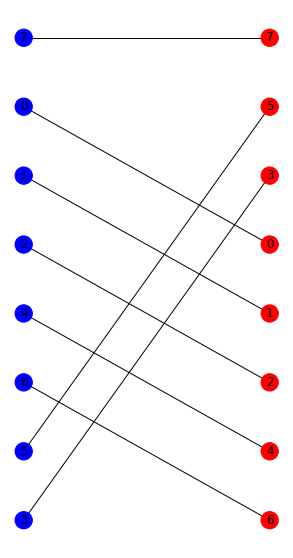

In [153]:
pyrankability.plot.spider(pyrankability.plot.AB_to_P2(details_lop_10_paired['P'][1],details_lop_10_paired['pair_details']['P'][1]))

In [156]:
perm_x = details_lop_10_paired['P'][1]
x = details_lop_10_paired['xs'][1]

k_,details_ = pyrankability.search.solve_max_tau(D,k_lop_10_paired,x,method='lop',verbose=False)
k_

10.0

### Find the two most distant

In [158]:
k_two_distant,details_two_distant = pyrankability.search.solve_pair_max_tau(D,method='lop',verbose=True)
k_two_distant

Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Updating opjective in 0.0036 seconds
Start optimization 0
Optimize a model with 112 rows, 28 columns and 336 nonzeros
Variable types: 0 continuous, 28 integer (28 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 18.0000000
Found heuristic solution: objective 22.0000000
Presolve time: 0.00s
Presolved: 112 rows, 28 columns, 336 nonzeros
Variable types: 0 continuous, 28 integer (28 binary)

Root relaxation: objective 2.500000e+01, 7 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      25.0000000   25.00000  0.00%     -    0s

Explored 0 nodes (7 simplex iterations) in 0.02 seconds
Thread count was 8 (of 8 availa

15.0

In [159]:
details_two_distant

{'obj': 15.0,
 'k_x': 25.0,
 'k_y': 25.0,
 'perm_x': (7, 5, 3, 0, 1, 2, 4, 6),
 'perm_y': (0, 1, 2, 4, 6, 7, 5, 3),
 'x': array([[0, 1, 1, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 1, 0],
        [1, 1, 1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0]]),
 'y': array([[0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 1, 1],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 0, 1, 0, 1, 0, 0]]),
 'u': array([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]),
 'v': array([[0, 0, 0, 1, 0, 1, 0, 1],
        

In [160]:
k_two_distant,details_two_distant = pyrankability.search.solve_pair_max_tau(D,method='hillside',verbose=True)
k_two_distant

Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Updating opjective in 0.0036 seconds
Start optimization 0
Optimize a model with 112 rows, 28 columns and 336 nonzeros
Variable types: 0 continuous, 28 integer (28 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 8e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 62.0000000
Found heuristic solution: objective 56.0000000
Presolve removed 76 rows and 13 columns
Presolve time: 0.00s
Presolved: 36 rows, 15 columns, 92 nonzeros
Found heuristic solution: objective 54.0000000
Variable types: 0 continuous, 15 integer (15 binary)

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 8 (of 8 available processors)

Solution count 3: 54 56 58 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.400000000000e+01, best bound 5.400000000000e+01, gap 0.0000%
Optimization in 0.0174 seconds
End optimiza

3.0

In [161]:
details_two_distant

{'obj': 3.0,
 'k_x': 54.0,
 'k_y': 54.0,
 'perm_x': (0, 7, 1, 5, 2, 4, 3, 6),
 'perm_y': (0, 1, 7, 2, 5, 3, 4, 6),
 'x': array([[0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0]]),
 'y': array([[0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0]]),
 'u': array([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]),
 'v': array([[0, 0, 0, 0, 0, 0, 0, 0],
        [

## How about the most similar?

In [173]:
k_two_sim,details_two_sim = pyrankability.search.solve_pair_min_tau(D,method='hillside',verbose=True)
k_two_sim

Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Updating opjective in 0.0028 seconds
Start optimization 0
Optimize a model with 112 rows, 28 columns and 336 nonzeros
Variable types: 0 continuous, 28 integer (28 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 8e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 62.0000000
Found heuristic solution: objective 56.0000000
Presolve removed 76 rows and 13 columns
Presolve time: 0.00s
Presolved: 36 rows, 15 columns, 92 nonzeros
Found heuristic solution: objective 54.0000000
Variable types: 0 continuous, 15 integer (15 binary)

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 8 (of 8 available processors)

Solution count 3: 54 56 58 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.400000000000e+01, best bound 5.400000000000e+01, gap 0.0000%
Optimization in 0.0171 seconds
End optimiza

1.0

In [174]:
details_two_sim['perm_x'],details_two_sim['perm_y']

((0, 7, 1, 5, 2, 3, 4, 6), (0, 7, 1, 5, 2, 4, 3, 6))

### You can set the minimum number of discordant pairs

In [169]:
k_two_sim,details_two_sim = pyrankability.search.solve_pair_min_tau(D,method='hillside',verbose=True,min_dis=3)
k_two_sim

Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Updating opjective in 0.0028 seconds
Start optimization 0
Optimize a model with 112 rows, 28 columns and 336 nonzeros
Variable types: 0 continuous, 28 integer (28 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 8e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 62.0000000
Found heuristic solution: objective 56.0000000
Presolve removed 76 rows and 13 columns
Presolve time: 0.00s
Presolved: 36 rows, 15 columns, 92 nonzeros
Found heuristic solution: objective 54.0000000
Variable types: 0 continuous, 15 integer (15 binary)

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 8 (of 8 available processors)

Solution count 3: 54 56 58 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.400000000000e+01, best bound 5.400000000000e+01, gap 0.0000%
Optimization in 0.0126 seconds
End optimiza

3.0

### N-pal 13 example

In [175]:
data=open("../N-pal13").read().split("\n")
data=data[1:-1]
dt = []
for line in data:
    dt.append([int(k) for k in line.split()])
D_N_pal13 = pd.DataFrame(dt)
D_N_pal13

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1,0,1,1,0,0,0,0,1,1,0,1
1,0,0,1,0,1,1,0,0,0,0,1,1,0
2,1,0,0,1,0,1,1,0,0,0,0,1,1
3,0,1,0,0,1,0,1,1,0,0,0,0,1
4,0,0,1,0,0,1,0,1,1,0,0,0,0
5,1,0,0,1,0,0,1,0,1,1,0,0,0
6,1,1,0,0,1,0,0,1,0,1,1,0,0
7,1,1,1,0,0,1,0,0,1,0,1,1,0
8,1,1,1,1,0,0,1,0,0,1,0,1,1
9,0,1,1,1,1,0,0,1,0,0,1,0,1


In [179]:
k_two_distant,details_two_distant = pyrankability.search.solve_pair_max_tau(D_N_pal13.values,method='lop')

k_two_distant

Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Updating opjective in 0.0052 seconds
Start optimization 0
Optimize a model with 572 rows, 78 columns and 1716 nonzeros
Variable types: 0 continuous, 78 integer (78 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 45.0000000
Found heuristic solution: objective 50.0000000
Presolve time: 0.00s
Presolved: 572 rows, 78 columns, 1716 nonzeros
Variable types: 0 continuous, 78 integer (78 binary)

Root relaxation: objective 5.700000e+01, 49 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      57.0000000   57.00000  0.00%     -    0s

Explored 0 nodes (49 simplex iterations) in 0.02 seconds
Thread count was 8 (of 8 av

34.0

For this example we've found the full P set:

In [180]:
details_two_distant['perm_x'],details_two_distant['perm_y']

((8, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 2, 5),
 (7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4))

In [181]:
pyrankability.common.tau(details_two_distant['perm_x'],details_two_distant['perm_y'])

0.1282051282051282

In [182]:
D2 = copy.deepcopy(D_N_pal13.values)
D2[0,3] = 1
D2[4,3] = 1
D2[5,8] = 1
D2[5,10] = 1
D2[7,9] = 1
D2[11,9] = 1

In [183]:
D2

array([[0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0],
       [1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1],
       [0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1],
       [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]])

In [184]:
k_D2,details_D2 = pyrankability.rank.solve(D2,method='lop',verbose=True)
k_D2

Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Updating opjective in 0.0059 seconds
Start optimization 0
Optimize a model with 572 rows, 78 columns and 1716 nonzeros
Variable types: 0 continuous, 78 integer (78 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 46.0000000
Found heuristic solution: objective 51.0000000
Presolve time: 0.00s
Presolved: 572 rows, 78 columns, 1716 nonzeros
Variable types: 0 continuous, 78 integer (78 binary)

Root relaxation: objective 5.900000e+01, 53 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      59.0000000   59.00000  0.00%     -    0s

Explored 0 nodes (53 simplex iterations) in 0.02 seconds
Thread count was 8 (of 8 av

59.0

In [186]:
k_pal13,detail_pad13 = pyrankability.rank.solve(D_N_pal13.values,method='lop')
k_pal13

57.0

In [187]:
k_two_distant_D2,details_two_distant_D2 = pyrankability.search.solve_pair_max_tau(D_N_pal13.values,D2=D2,method='lop',verbose=True)
k_two_distant_D2

Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Updating opjective in 0.0048 seconds
Start optimization 0
Optimize a model with 572 rows, 78 columns and 1716 nonzeros
Variable types: 0 continuous, 78 integer (78 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 45.0000000
Found heuristic solution: objective 50.0000000
Presolve time: 0.00s
Presolved: 572 rows, 78 columns, 1716 nonzeros
Variable types: 0 continuous, 78 integer (78 binary)

Root relaxation: objective 5.700000e+01, 49 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      57.0000000   57.00000  0.00%     -    0s

Explored 0 nodes (49 simplex iterations) in 0.02 seconds
Thread count was 8 (of 8 av

28.0

In [188]:
pyrankability.common.tau(details_two_distant_D2['perm_x'],details_two_distant_D2['perm_y'])

0.28205128205128205

# Haven't updated below (yet)
Everything is working. And the rest is really just redundant but I'll update later

In [189]:
k_two_distant_jonad,details_two_distant_jonad = pyrankability.lop.bilp_two_most_distant_jonad(D_N_pal13.values,verbose=True)
k_two_distant_jonad

AttributeError: module 'pyrankability' has no attribute 'lop'

In [35]:
details_two_distant_jonad['perm_x'],details_two_distant_jonad['perm_y']

((7, 10, 8, 2, 11, 5, 0, 9, 3, 12, 6, 1, 4),
 (8, 11, 6, 0, 9, 3, 12, 7, 1, 10, 4, 2, 5))

In [35]:
calc_con_dis(details_two_distant_jonad['perm_x'],details_two_distant_jonad['perm_y'])

NameError: name 'details_two_distant_jonad' is not defined

In [38]:
calc_con_dis(details_two_distant['perm_x'],details_two_distant['perm_y'])

(44, 34)

In [86]:
np.argsort([3,1,2]) 

array([1, 2, 0])

In [39]:
full_P = [[4, 10, 1, 12, 3, 9, 0, 6, 5, 11, 2, 8, 7],
[4, 1, 12, 3, 9, 0, 6, 5, 11, 2, 8, 10, 7],
[4, 1, 6, 12, 3, 9, 0, 5, 11, 2, 8, 10, 7],
[4, 10, 1, 6, 12, 3, 9, 0, 5, 11, 2, 8, 7],
[5, 4, 10, 1, 6, 12, 3, 9, 0, 11, 2, 8, 7],
[5, 4, 10, 1, 12, 3, 9, 0, 6, 11, 2, 8, 7],
[5, 4, 10, 1, 7, 6, 12, 3, 9, 0, 11, 2, 8],
[5, 4, 10, 1, 7, 12, 3, 9, 0, 6, 11, 2, 8],
[5, 2, 4, 10, 1, 7, 12, 3, 9, 0, 6, 11, 8],
[5, 2, 4, 10, 1, 7, 6, 12, 3, 9, 0, 11, 8]]
for i in range(len(full_P)):
    full_P[i] = full_P[i][::-1]
full_P

[[7, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 10, 4],
 [7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4],
 [7, 10, 8, 2, 11, 5, 0, 9, 3, 12, 6, 1, 4],
 [7, 8, 2, 11, 5, 0, 9, 3, 12, 6, 1, 10, 4],
 [7, 8, 2, 11, 0, 9, 3, 12, 6, 1, 10, 4, 5],
 [7, 8, 2, 11, 6, 0, 9, 3, 12, 1, 10, 4, 5],
 [8, 2, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 5],
 [8, 2, 11, 6, 0, 9, 3, 12, 7, 1, 10, 4, 5],
 [8, 11, 6, 0, 9, 3, 12, 7, 1, 10, 4, 2, 5],
 [8, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 2, 5]]

In [40]:
len(full_P)

10

Find all concordant pairs and discordant pairs

In [41]:
uc=np.zeros((n,n))
vc=np.zeros((n,n))
ncons = np.zeros((len(full_P),len(full_P)))
ndiss = np.zeros((len(full_P),len(full_P)))
for k,perm_x in enumerate(full_P):
    for z,perm_y in enumerate(full_P):
        ncon = 0
        ndis = 0
        for i in range(n): # i is an item
            i_x = np.where(np.array(perm_x)==i)[0] # location of i in perm_x
            i_y = np.where(np.array(perm_y)==i)[0] # location of i in perm_y
            for j in range(i+1,n): # j is another item
                j_x = np.where(np.array(perm_x)==j)[0] # location of j in perm_x
                j_y = np.where(np.array(perm_y)==j)[0] # location of j in perm_y
                if i_x-j_x > 0 and i_y-j_y < 0:
                    vc[i,j] = 1
                    ndis += 1
                elif i_x-j_x < 0 and i_y-j_y > 0:
                    uc[i,j] = 1
                    ndis += 1
                elif i_x-j_x > 0 and i_y-j_y > 0:
                    ncon += 1
                elif i_x-j_x < 0 and i_y-j_y < 0:
                    ncon += 1
        ncons[k,z] = ncon
        ndiss[k,z] = ndis
ncons = pd.DataFrame(ncons).astype(int)
ndiss = pd.DataFrame(ndiss).astype(int)

In [42]:
ncons

,0,1,2,3,4,5,6,7,8,9
0,28,28,26,26,21,23,17,19,15,13
1,28,28,26,26,21,23,17,19,15,13
2,26,26,28,28,23,21,19,17,13,15
3,26,26,28,28,23,21,19,17,13,15
4,21,21,23,23,28,26,24,22,18,20
5,23,23,21,21,26,28,22,24,20,18
6,17,17,19,19,24,22,28,26,20,22
7,19,19,17,17,22,24,26,28,22,20
8,15,15,13,13,18,20,20,22,28,26
9,13,13,15,15,20,18,22,20,26,28


In [43]:
ndiss

,0,1,2,3,4,5,6,7,8,9
0,0,0,2,2,7,5,11,9,13,15
1,0,0,2,2,7,5,11,9,13,15
2,2,2,0,0,5,7,9,11,15,13
3,2,2,0,0,5,7,9,11,15,13
4,7,7,5,5,0,2,4,6,10,8
5,5,5,7,7,2,0,6,4,8,10
6,11,11,9,9,4,6,0,2,8,6
7,9,9,11,11,6,4,2,0,6,8
8,13,13,15,15,10,8,8,6,0,2
9,15,15,13,13,8,10,6,8,2,0


What is the best pair? Best in this case being the farthest away.

In [44]:
best_pair = ndiss.stack().idxmax()
best_pair

(0, 9)

In [45]:
print(full_P[best_pair[0]])
print(full_P[best_pair[1]])

[7, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 10, 4]
[8, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 2, 5]


What did we find using our algorithm?

In [46]:
print(details_two_distant['perm_y'])
print(details_two_distant['perm_x'])

(7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4)
(8, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 2, 5)


It's the same!

### How does hillside compare?

In [47]:
k_two_distant_hillside,details_two_distant_hillside = pyrankability.hillside.bilp_two_most_distant(D_N_pal13.values,verbose=True)

k_two_distant_hillside

Updating opjective in 0.0067 seconds
Start optimization 0
Optimization in 0.0075 seconds
End optimization 0
Finished first optimization. Obj: 436
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Start optimization
Optimize a model with 1302 rows, 312 columns and 4024 nonzeros
Variable types: 0 continuous, 312 integer (312 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Found heuristic solution: objective -0.0000000
Presolve removed 1242 rows and 272 columns
Presolve time: 0.00s
Presolved: 60 rows, 40 columns, 180 nonzeros
Found heuristic solution: objective 16.0000000
Variable types: 0 continuous, 40 integer (40 binary)

Root relaxation: cutoff, 0 iterations, 0.00 seconds

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 8 (of 8 available processors)

Solution count 2: 16 6 

Optimal solution found (tolerance 1.00e-04)
Bes

436

In [48]:
print(details_two_distant_hillside['perm_y'])
print(details_two_distant_hillside['perm_x'])

(8, 11, 9, 7, 12, 10, 6, 2, 0, 5, 3, 1, 4)
(8, 7, 9, 11, 0, 2, 6, 10, 12, 1, 3, 5, 4)
